In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import cv2

Using TensorFlow backend.


In [4]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
(_, _), (_, class_labels) = cifar10.load_data()

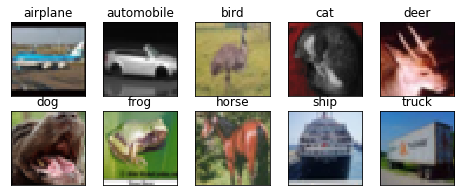

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
from keras.utils import np_utils
# train_features = train_features.astype('float32')/255
# test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
def plot_model_history(model_history):
  
  fig, axs = plt.subplots(1,2,figsize=(15,5))
  # summarize history for accuracy
  axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
  axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
  axs[0].set_title('Model Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
  axs[0].legend(['train', 'val'], loc='best')
  # summarize history for loss
  axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
  axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
  axs[1].set_title('Model Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
  axs[1].legend(['train', 'val'], loc='best')
  plt.show()

In [0]:
def accuracy(test_x, test_y, model):
  
  result = model.predict(test_x)
  predicted_class = np.argmax(result, axis=1)
  true_class = np.argmax(test_y, axis=1)
  num_correct = np.sum(predicted_class == true_class) 
  accuracy = float(num_correct)/result.shape[0]
  return (accuracy * 100)

In [0]:
# Initially, Run the Model & Save the Weights other wise directly load the model.
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # 3,30
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3)) # 5,28
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(128, 3)) # 7,26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32, 1)) # 7,26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # 14,13
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3)) # 16,11
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(128, 3)) # 18,9
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 1)) # 18,9
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # 36,4
model.add(Dropout(0.25))

model.add(Convolution2D(10, 5)) 
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
__________

In [0]:
import tensorflow as tf
from keras.models import load_model
model = load_model("/content/drive/My Drive/model-cifar-without-scalling.h5", custom_objects={'tf': tf})

In [0]:
preds = model.predict(test_features)

In [0]:
preds_index = np.argmax(preds,axis=1)

In [0]:
preds_index = preds_index.tolist()
# to convert 2-d array to list 
class_labels = class_labels.ravel()

In [0]:
# index
correct_index, misclassified_index = [],[]
for i in range(len(class_labels)):
  if preds_index[i] == class_labels[i]:
    correct_index.append(i)
  else:
    misclassified_index.append(i)

In [13]:
len(correct_index), len(misclassified_index)

(8452, 1548)

In [14]:
import pandas as pd
pd.Series(preds_index).value_counts().sort_index()

0    1012
1    1045
2     992
3     822
4    1037
5    1030
6    1116
7     970
8    1038
9     938
dtype: int64

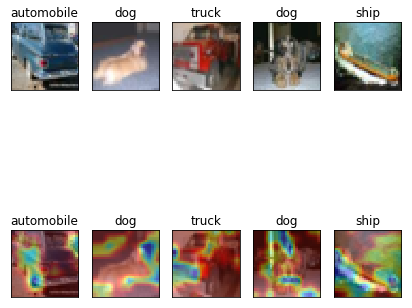

In [23]:
# correct index plot

fig , axarr = plt.subplots(2,5, figsize=(7, 7))

for index, value in enumerate(np.random.choice(correct_index, size = 5)):
  img = test_features[value]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_7")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    
  axarr[0,index].imshow(img)
  axarr[0,index].set_title(class_names[np.argmax(test_labels[value])])
  axarr[0,index].set_xticks([])
  axarr[0,index].set_yticks([])
  
  axarr[1,index].imshow(superimposed_img)
  axarr[1,index].set_title(class_names[class_idx])
  axarr[1,index].set_xticks([])
  axarr[1,index].set_yticks([])
plt.show()

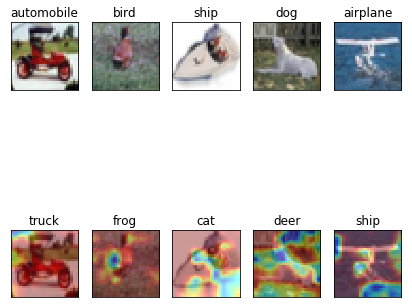

In [27]:
# incorrect index plot

fig , axarr = plt.subplots(2,5, figsize=(7, 7))

for index, value in enumerate(incorrect_index_list):
  img = test_features[value]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_7")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    
  axarr[0,index].imshow(img)
  axarr[0,index].set_title(class_names[np.argmax(test_labels[value])])
  axarr[0,index].set_xticks([])
  axarr[0,index].set_yticks([])
  
  axarr[1,index].imshow(superimposed_img)
  axarr[1,index].set_title(class_names[preds_index[value]])
  axarr[1,index].set_xticks([])
  axarr[1,index].set_yticks([])
plt.show()

## Now model trained with Cutout

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/model-cifar-cutout-without-scalling.h5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks=[checkpointer] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=99)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/99
390/390 [==============================] - 18s 45ms/step - loss: 1.5710 - acc: 0.4471 - val_loss: 1.6481 - val_acc: 0.4153

Epoch 00001: val_acc improved from -inf to 0.41530, saving model to /content/drive/My Drive/model-cifar-cutout-without-scalling.h5
Epoch 2/99
390/390 [==============================] - 16s 41ms/step - loss: 1.1874 - acc: 0.6035 - val_loss: 0.9952 - val_acc: 0.6669

Epoch 00002: val_acc improved from 0.41530 to 0.66690, saving model to /content/drive/My Drive/model-cifar-cutout-without-scalling.h5
Epoch 3/99
390/390 [==============================] - 16s 41ms/step - loss: 1.0069 - acc: 0.6678 - val_loss: 1.0190 - val_acc: 0.6462

Epoch 00003: val_acc did not improve from 0.66690
Epoch 4/99
390/390 [==============================] - 16s 41ms/step - loss: 0.9060 - acc: 0.6989 - val_loss: 1.0027 - val_acc: 0.6560

Epoch 00004: val_acc did not improve from 0.66690
Epoch 5/99
390/390 [==============================] - 16s 41ms/step - loss: 0.8345 - acc: 0.722

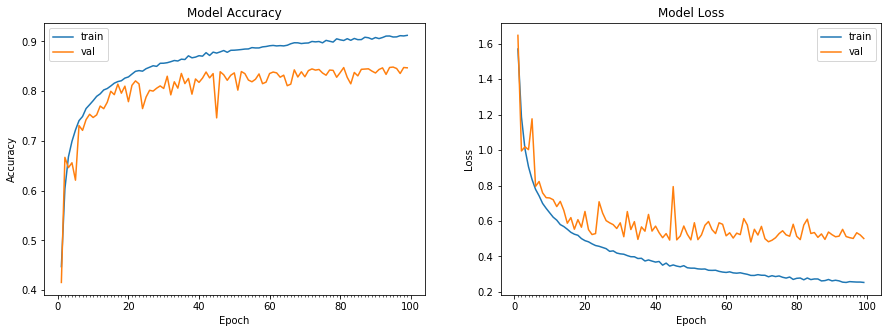

Accuracy on test data is: 84.70


In [0]:
# training w/o scalling + w/h cutout
from keras.preprocessing.image import ImageDataGenerator
import time
datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(),zoom_range=0.0, 
                             horizontal_flip=False)

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 99, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=callbacks)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)       73856     
__________

In [0]:
import tensorflow as tf
from keras.models import load_model
model = load_model("/content/drive/My Drive/model-cifar-cutout-without-scalling.h5", custom_objects={'tf': tf})

In [0]:
incorrect_index_list = [1969,799,6997,8451,1796]

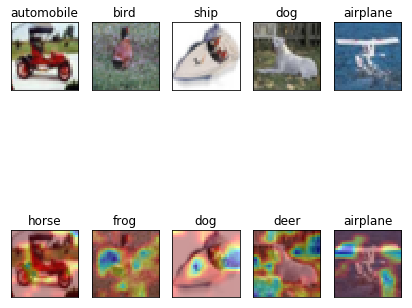

In [21]:
# After cutout plotting the incorrect class

fig , axarr = plt.subplots(2,5, figsize=(7, 7))

for index, value in enumerate(incorrect_index_list):
  img = test_features[value]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_15")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    
  axarr[0,index].imshow(img)
  axarr[0,index].set_title(class_names[np.argmax(test_labels[value])])
  axarr[0,index].set_xticks([])
  axarr[0,index].set_yticks([])
  
  axarr[1,index].imshow(superimposed_img)
  axarr[1,index].set_title(class_names[class_idx])
  axarr[1,index].set_xticks([])
  axarr[1,index].set_yticks([])
plt.show()

* **After we trained with Cutout the misclassified image of Airplane was preidcted correctly**.
